# Exploring the raw data

In [36]:

import os
import pandas as pd
import sys
sys.path.append(os.path.dirname(os.getcwd()))
import config as cfg
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [37]:
train_raw_data=pd.read_csv(cfg.train_raw_data)
train_raw_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,36,No,Travel_Rarely,329,Research & Development,2,3,Life Sciences,1,501,...,2,80,1,6,3,3,2,2,2,2
1,46,No,Non-Travel,1144,Research & Development,7,4,Medical,1,487,...,3,80,0,7,2,4,1,0,0,0
2,46,Yes,Travel_Rarely,377,Sales,9,3,Marketing,1,1457,...,1,80,1,28,1,4,7,7,4,3
3,45,No,Travel_Rarely,252,Research & Development,2,3,Life Sciences,1,834,...,4,80,0,1,3,3,1,0,0,0
4,43,No,Travel_Frequently,775,Sales,15,3,Life Sciences,1,754,...,3,80,1,7,5,3,2,2,2,2


In [38]:
train_raw_data.shape

(1176, 35)

* So we've 15000 records for this dataset and 10 columns 

### Missing values

In [39]:
train_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   Attrition                 1176 non-null   object
 2   BusinessTravel            1176 non-null   object
 3   DailyRate                 1176 non-null   int64 
 4   Department                1176 non-null   object
 5   DistanceFromHome          1176 non-null   int64 
 6   Education                 1176 non-null   int64 
 7   EducationField            1176 non-null   object
 8   EmployeeCount             1176 non-null   int64 
 9   EmployeeNumber            1176 non-null   int64 
 10  EnvironmentSatisfaction   1176 non-null   int64 
 11  Gender                    1176 non-null   object
 12  HourlyRate                1176 non-null   int64 
 13  JobInvolvement            1176 non-null   int64 
 14  JobLevel                

In [40]:
train_raw_data.isna().sum().sort_values()

Age                         0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
MonthlyIncome               0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
StandardHours               0
YearsSinceLastPromotion     0
MaritalStatus               0
JobRole                     0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
JobSatisfaction             0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
EmployeeCo

* Hence we see that there aren't any missing values

## Let's check the correlation 

In [41]:
num_cols=[col for col in train_raw_data.columns if train_raw_data[col].dtype=='int64' or train_raw_data[col].dtype=='float64']
print("Numerical columns:",len(num_cols))

Numerical columns: 26


In [42]:
str_cols=[col for col in train_raw_data.columns if train_raw_data[col].dtype=='object']
str_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [43]:
#transformation of attrition
train_raw_data['Left?']=train_raw_data['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
train_raw_data.drop('Attrition',axis=1,inplace=True)
train_raw_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Left?
0,36,Travel_Rarely,329,Research & Development,2,3,Life Sciences,1,501,4,...,80,1,6,3,3,2,2,2,2,0
1,46,Non-Travel,1144,Research & Development,7,4,Medical,1,487,3,...,80,0,7,2,4,1,0,0,0,0
2,46,Travel_Rarely,377,Sales,9,3,Marketing,1,1457,1,...,80,1,28,1,4,7,7,4,3,1
3,45,Travel_Rarely,252,Research & Development,2,3,Life Sciences,1,834,2,...,80,0,1,3,3,1,0,0,0,0
4,43,Travel_Frequently,775,Sales,15,3,Life Sciences,1,754,4,...,80,1,7,5,3,2,2,2,2,0


In [44]:
num_cols.append('Left?')

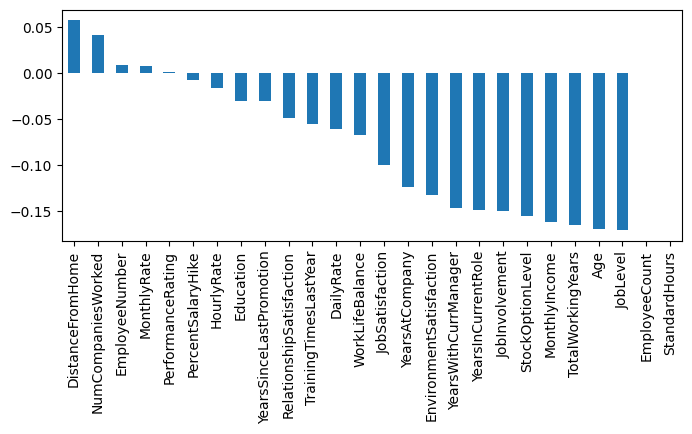

In [45]:
plt.figure(figsize=(8,3))
train_raw_data[num_cols].corr()['Left?'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.show()

In [46]:
num_corr=train_raw_data[num_cols].corr()['Left?'].sort_values(ascending=False)[1:]
useful_num=[cols for cols in num_corr.index if abs(num_corr[cols])>=0.08]
useful_num

['JobSatisfaction',
 'YearsAtCompany',
 'EnvironmentSatisfaction',
 'YearsWithCurrManager',
 'YearsInCurrentRole',
 'JobInvolvement',
 'StockOptionLevel',
 'MonthlyIncome',
 'TotalWorkingYears',
 'Age',
 'JobLevel']

In [47]:
new_train_df=train_raw_data[useful_num]
new_train_df['Left?']=train_raw_data['Left?']

C:\Users\asus\AppData\Local\Temp\ipykernel_30252\1917690712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df['Left?']=train_raw_data['Left?']


In [48]:
new_train_df.head()

,JobSatisfaction,YearsAtCompany,EnvironmentSatisfaction,YearsWithCurrManager,YearsInCurrentRole,JobInvolvement,StockOptionLevel,MonthlyIncome,TotalWorkingYears,Age,JobLevel,Left?
0,3,2,4,2,2,3,1,2543,6,36,1,0
1,3,1,3,0,0,3,0,5258,7,46,2,0
2,4,7,1,3,7,3,1,10096,28,46,3,1
3,3,1,2,0,0,2,0,2274,1,45,1,0
4,4,2,4,2,2,2,1,6804,7,43,2,0


In [49]:
#Ordinal columns
ord_cols=[
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobLevel'
]
## Categorical columns
str_cols=[
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

train_raw_data[str_cols].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,No
1,Non-Travel,Research & Development,Medical,Female,Manufacturing Director,Married,Y,No
2,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Divorced,Y,No
3,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Single,Y,No
4,Travel_Frequently,Sales,Life Sciences,Male,Sales Executive,Married,Y,No


In [50]:
train_raw_data[str_cols].value_counts()

BusinessTravel     Department              EducationField  Gender  JobRole                MaritalStatus  Over18  OverTime
Travel_Rarely      Research & Development  Life Sciences   Male    Laboratory Technician  Married        Y       No          15
                                                                   Research Scientist     Married        Y       No          15
                   Sales                   Marketing       Male    Sales Executive        Married        Y       No          13
                                           Life Sciences   Male    Sales Executive        Married        Y       No          13
                   Research & Development  Medical         Male    Research Scientist     Single         Y       No          13
                                                                                                                             ..
Travel_Frequently  Sales                   Life Sciences   Male    Sales Executive        Single         Y    

In [51]:
ord_encoder=OrdinalEncoder()
ord_new_cols=ord_encoder.fit_transform(new_train_df[ord_cols])
new_train_df=pd.concat([new_train_df,pd.DataFrame(ord_new_cols)],axis=1)
new_train_df.drop(ord_cols,axis=1,inplace=True)


In [52]:
one_hot_encode=OneHotEncoder()
cat_cols=one_hot_encode.fit_transform(train_raw_data[str_cols]).toarray()
new_train_df=pd.concat([new_train_df,pd.DataFrame(cat_cols)],axis=1)
new_train_df.head(5)


,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,StockOptionLevel,MonthlyIncome,TotalWorkingYears,Age,Left?,0,1,...,19,20,21,22,23,24,25,26,27,28
0,2,2,2,1,2543,6,36,0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1,0,0,0,5258,7,46,0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,7,3,7,1,10096,28,46,1,3.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1,0,0,0,2274,1,45,0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,2,2,2,1,6804,7,43,0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [53]:
X,Y=new_train_df.drop('Left?',axis=1),new_train_df['Left?']
scaler=StandardScaler()
scaled_train_df=scaler.fit_transform(X=X.values)
len(scaled_train_df[0])

40

In [54]:
tsne=TSNE(n_components=2,perplexity=30.0,learning_rate='auto',verbose=1)
X_tsne=tsne.fit_transform(scaled_train_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1176 samples in 0.000s...
[t-SNE] Computed neighbors for 1176 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1176
[t-SNE] Computed conditional probabilities for sample 1176 / 1176
[t-SNE] Mean sigma: 2.435105


[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.771774
[t-SNE] KL divergence after 1000 iterations: 0.903120


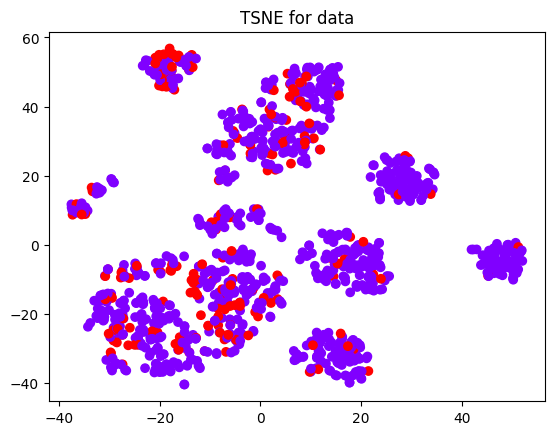

In [55]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=new_train_df['Left?'],cmap='rainbow')
plt.title('TSNE for data')
plt.show()

In [56]:
logist=LogisticRegression()
cv_scores=cross_validate(logist,X=scaled_train_df,y=Y,cv=3,return_train_score=True)
print(cv_scores['train_score'].mean())
print(cv_scores['test_score'].mean())
logist.fit(scaled_train_df,Y)


0.8741496598639457
0.8588435374149661


LogisticRegression()

In [57]:
sgd=SGDClassifier(loss='hinge')
cv_scores=cross_validate(sgd,X=scaled_train_df,y=Y,cv=3,return_train_score=True)
print(cv_scores['train_score'].mean())
print(cv_scores['test_score'].mean())

0.8278061224489797
0.810374149659864


In [58]:
svc=SVC()
cv_scores=cross_validate(svc,X=scaled_train_df,y=Y,cv=3,return_train_score=True)
print(cv_scores['train_score'].mean())
print(cv_scores['test_score'].mean())

0.8898809523809524
0.8554421768707483


In [59]:
dt=DecisionTreeClassifier()
cv_scores=cross_validate(dt,X=scaled_train_df,y=Y,cv=3,return_train_score=True)
print(cv_scores['train_score'].mean())
print(cv_scores['test_score'].mean())

1.0
0.7933673469387754


In [60]:
#### Let's try to model it using deep learning
## importing standard libraries
X_train,X_test,Y_train,Y_test=train_test_split(scaled_train_df,Y,test_size=0.9)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
ann=Sequential() #Define the mode
ann.add(Dense(40,activation='relu')) #Add the first layer
ann.add(Dense(20,activation='relu')) #Add the second layer
ann.add(Dense(10,activation='relu')) #Add the third layer
ann.add(Dense(1)) #Add the output layer

In [62]:
#Compile the code
ann.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [63]:
#fitting the model
'''
ann.fit(x=X_train,y=Y_train,epochs=250,verbose=True,validation_data=(X_test,Y_test))'''

'\nann.fit(x=X_train,y=Y_train,epochs=250,verbose=True,validation_data=(X_test,Y_test))'

In [64]:
'''model_loss=pd.DataFrame(ann.history.history)
model_loss[['accuracy','val_accuracy']].plot()'''

"model_loss=pd.DataFrame(ann.history.history)\nmodel_loss[['accuracy','val_accuracy']].plot()"

In [65]:
#Early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_accuracy',
                         mode='max',
                         verbose=1,
                         patience=2)

ann.fit(x=X_train,y=Y_train,epochs=100,validation_data=(X_test,Y_test),
        callbacks=[early_stop])


Epoch 1/100


4/4 [==============================] - 3s 204ms/step - loss: 1.9799 - accuracy: 0.8718 - val_loss: 2.4585 - val_accuracy: 0.8310
Epoch 2/100
4/4 [==============================] - 0s 67ms/step - loss: 1.9776 - accuracy: 0.8718 - val_loss: 2.4585 - val_accuracy: 0.8310
Epoch 3/100
4/4 [==============================] - 0s 84ms/step - loss: 1.9776 - accuracy: 0.8718 - val_loss: 2.4585 - val_accuracy: 0.8310
Epoch 3: early stopping


<Axes: >

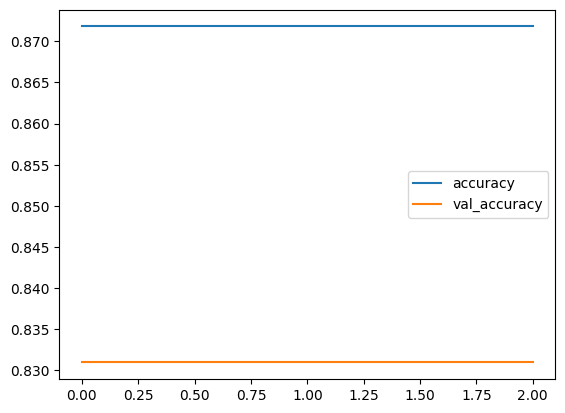

In [66]:
model_loss=pd.DataFrame(ann.history.history)
model_loss[['accuracy','val_accuracy']].plot()

In [67]:
# Designing the transformation pipelines
def transformation(df):
    useful=df[useful_num]
    ord_new_cols=ord_encoder.fit_transform(useful[ord_cols])
    useful=pd.concat([useful,pd.DataFrame(ord_new_cols)],axis=1)
    useful.drop(ord_cols,axis=1,inplace=True)
    cat_cols=one_hot_encode.fit_transform(df[str_cols]).toarray()
    useful=pd.concat([useful,pd.DataFrame(cat_cols)],axis=1)
    scaled_df=scaler.fit_transform(X=useful.values)
    return scaled_df
    
    


In [68]:
#importing test_data
test_df=pd.read_csv(cfg.test_raw_data)
test_df=transformation(test_df)
len(test_df[0])


40

In [69]:
def pred(values_df):
    if(values_df==1):
        return 'Yes'
    else:
        return 'No'
result_logi=logist.predict(test_df)
result_array=['Yes' if i==1 else 'No' for i in result_logi]
final_result=pd.DataFrame(result_array,columns=['Output'])
#final_result.index=range(1,len(final_result)+1)
#final_result=final_result.reset_index()
#final_result=final_result.rename(columns={'index':'ID'})

final_result

,Output
0,No
1,No
2,No
3,No
4,No
...,...
289,No
290,No
291,No
292,No


In [70]:
#Dumping the dataset as csv
final_result.to_csv(cfg.test_result_data,index=False)